## Title
### Introduction:
    - provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
    - clearly state the question you tried to answer with your project
    - identify and fully describe the dataset that was used to answer the question
    
### Methods & Results:
    - describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
    - your report should include code which:
    - loads data
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis 
    - note: all figures should have a figure number and a legend
    
### Discussion:
    - summarize what you found
    - discuss whether this is what you expected to find?
    - discuss what impact could such findings have?
    - discuss what future questions could this lead to?
#### References
    - You may include references if necessary, as long as they all have a consistent citation style.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
set.seed(1)

url1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
download.file(url1, destfile = "data/players.csv")
players <- read_csv("data/players.csv")
download.file(url2, destfile = "data/sessions.csv")
sessions <- read_csv("data/sessions.csv")
players
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
# Data Wrangling
# Sessions dataset
# Convert `start_time` and `end_time` to readable datetime
sessions_data <- sessions |>
mutate (start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
mutate (end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) |>
# Compute the session length
mutate (session_length = (end_time - start_time)/60) |>
# Convert session length to numeric value in hours
mutate(session_length = as.numeric(session_length)) |>
select(hashedEmail, session_length)

# Players dataset
# Only use columns with values
players_data <- players |>
    select(experience:age)
sessions_data
players_data


hashedEmail,session_length
<chr>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,0.2000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,0.2166667
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,0.3833333
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,0.3500000
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,0.1166667
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,0.3166667


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


In [4]:
# Compute the session couts for each player
session_counts <- sessions_data |>
    group_by(hashedEmail) |>
    summarize(count = n())

# Compute the total session lengths for each player
session_lengths <- sessions_data |> 
group_by(hashedEmail)|>
summarize(total_played_hours = sum(session_length))

# Join the session counts and to players_data based on hashedEmail
set3 <- players_data |>
    left_join(session_counts, by = "hashedEmail")

# Join the total_played_hours and to players_data based on hashedEmail
set3 <- set3 |>
left_join(session_lengths, by = "hashedEmail")

set3

experience,subscribe,hashedEmail,played_hours,name,gender,age,count,total_played_hours
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,33.65000000
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,4.25000000
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,0.08333333
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,0.08333333
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6,2.98333333
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1,0.25000000


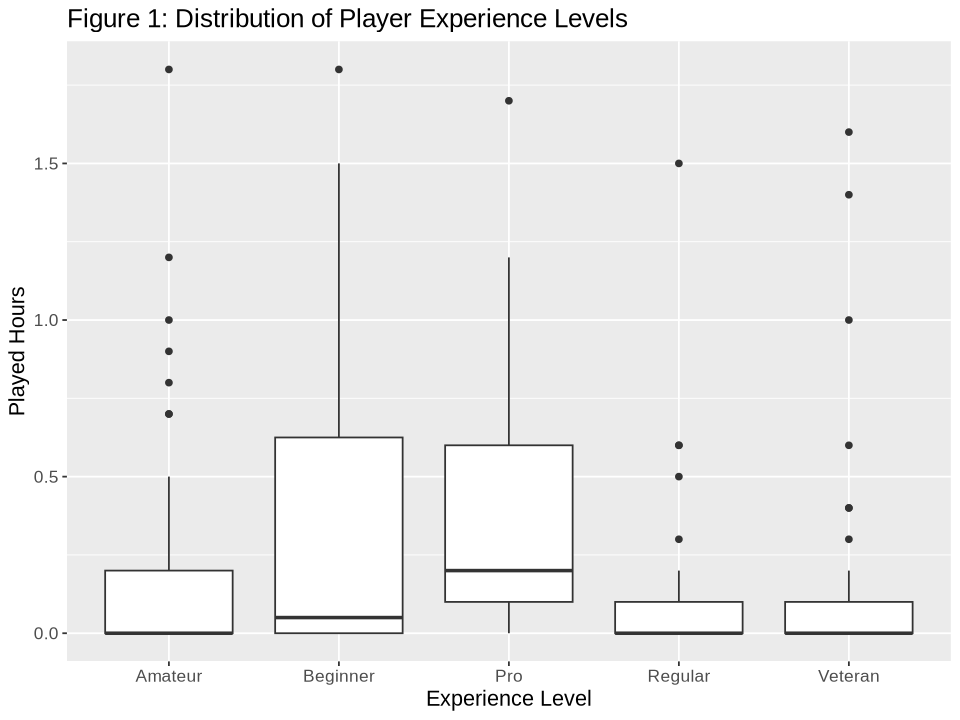

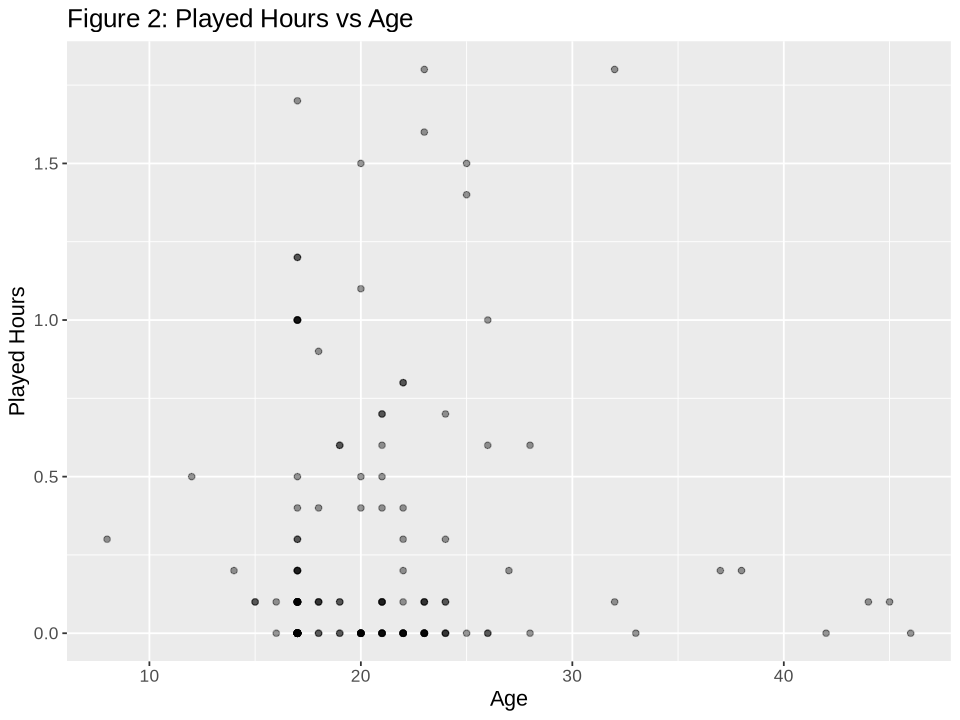

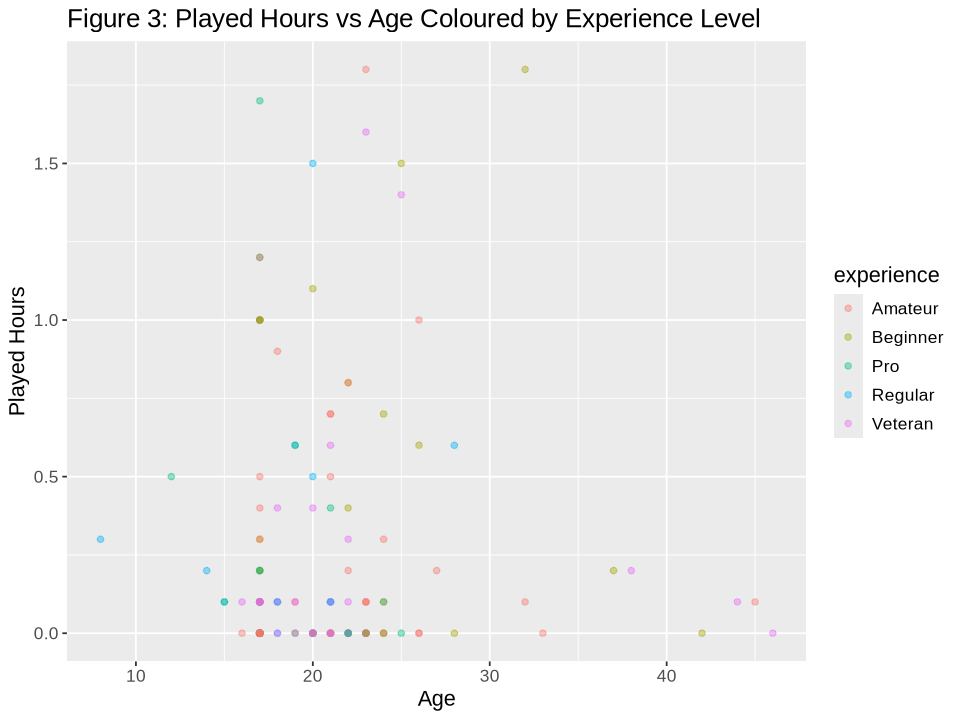

In [5]:
options(repr.plot.width = 8, repr.plot.height = 6)
# Played hours vs. Experience
# plot1 <- ggplot(set3, aes(x = experience)) +
#   geom_bar(fill = "lightgreen", color = "black") +
#   labs(
#     title = "Distribution of Player Experience Levels",
#     x = "Experience Level",
#     y = "Count of Players"
#   )

# plot2 <- ggplot(set3, aes(x = experience, y = played_hours)) +
#   geom_bar(stat = 'identity', position = "dodge") +
#   labs(
#     title = "Distribution of Player Experience Levels",
#     x = "Experience Level",
#     y = "Total Played hours"
#   )
set4 <- set3|>
    filter(played_hours < 2)
plot3 <- ggplot(set4, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Figure 1: Distribution of Player Experience Levels",
    x = "Experience Level",
    y = "Played Hours") +
theme(text = element_text(size = 13))
  

set5 <- set3|>
    filter(age < 50 & played_hours < 2) 
# Played hours vs. Age
plot4 <- ggplot(set5, aes(x = age, y = played_hours)) +
  geom_point(alpha=0.4) +
  labs(
    title = "Figure 2: Played Hours vs Age",
    x = "Age",
    y = "Played Hours") +
theme(text = element_text(size = 13))

plot5 <- set5 |>
ggplot(aes(x = age, y = played_hours)) +
geom_point(aes(color = experience), alpha = 0.4) +
xlab("Age") +
ylab("Played Hours") +
ggtitle("Figure 3: Played Hours vs Age Coloured by Experience Level") +
theme(text = element_text(size = 13))


plot3
plot4
plot5

In [6]:
#knn regression set up
library(caret)

training1_one_hot_encoding <- data.frame(experience = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))

dmy <- dummyVars("~ experience", data = training1_one_hot_encoding)

trsf <- data.frame(predict(dmy, newdata = training1_one_hot_encoding))

training1_combined <- cbind(training1_one_hot_encoding, trsf)

print(training1_combined)

df <- c("Beginner", "Amateur", "Regular", "Veteran", "Pro")

encoded_factor <- set3 |>
    mutate(experience = as.factor(experience))

encoded_df <- encoded_factor |>
    tidyr::pivot_longer(
        cols = experience,
        names_to = "category",
        values_to = "value"
    ) |>
    group_by(category) |>
    mutate(value = factor(value, levels = unique(value))) |>
    ungroup()
    # select(value)

combined_df <- encoded_df |>
    left_join(training1_combined, by = c("value" = "experience"))

combined_df
# print(encoded_df)
# # 2. One-hot encoding using dummyVars
# training1_one_hot_encoding <- data.frame(experience = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))

# dmy <- dummyVars("~ experience", data = training1_one_hot_encoding)
# trsf <- data.frame(predict(dmy, newdata = training1_one_hot_encoding))

# # 3. Combine the original data with one-hot encoded columns
# training1_combined <- cbind(training1_one_hot_encoding, trsf)

# # Output the results
# print(training1_combined)

# knn_spec <- nearest_neighbour(weight_func = "rectangular", neighbours = tune()) |>
#    set_engine("kknn") |>
#    set_mode("regression")

# knn_recipe <- recipe(played_hours ~ age

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




  experience experienceAmateur experienceBeginner experiencePro
1   Beginner                 0                  1             0
2    Amateur                 1                  0             0
3    Regular                 0                  0             0
4    Veteran                 0                  0             0
5        Pro                 0                  0             1
  experienceRegular experienceVeteran
1                 0                 0
2                 0                 0
3                 1                 0
4                 0                 1
5                 0                 0


subscribe,hashedEmail,played_hours,name,gender,age,count,total_played_hours,category,value,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran
<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,33.65000000,experience,Pro,0,0,1,0,0
TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,4.25000000,experience,Veteran,0,0,0,0,1
FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,0.08333333,experience,Veteran,0,0,0,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,0.08333333,experience,Amateur,1,0,0,0,0
FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6,2.98333333,experience,Amateur,1,0,0,0,0
TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1,0.25000000,experience,Pro,0,0,1,0,0


In [7]:
# Get rid of outliers and split the data
set.seed(3)
combined_df_no_outliers <- combined_df |>
filter(total_played_hours < 1.5) # From the boxplot, any played_hours larger than 1.5 hours are clearly outliers.
split1 <- initial_split(combined_df_no_outliers, prop = 0.70, strata = total_played_hours)
training1 <- training(split1)
testing1 <- testing(split1)

combined_df_no_outliers

subscribe,hashedEmail,played_hours,name,gender,age,count,total_played_hours,category,value,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran
<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,0.08333333,experience,Veteran,0,0,0,0,1
TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,0.83333333,experience,Amateur,1,0,0,0,0
TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,0.15000000,experience,Regular,0,0,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,1,0.35000000,experience,Veteran,0,0,0,0,1
FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,0.08333333,experience,Amateur,1,0,0,0,0
TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1,0.25000000,experience,Pro,0,0,1,0,0


In [8]:
# #linear regression!

# lin_spec <- linear_reg() |>
#     set_engine("lm") |>
#     set_mode("regression")

# lin_spec

# lin_recipe <- recipe(played_hours ~ age + experience, data = training1)

# lin_fit <- workflow() |>
#     add_recipe(lin_recipe) |>
#     add_model(lin_spec) |>
#     fit(data = training1)

# lin_training_test <- lin_fit |>
#     predict(training1) |>
#     bind_cols(training1)

# lin_training_test

# lin_training_predictions_age <- lin_training_test |>
#     ggplot(aes(x = age, y = played_hours)) +
#         geom_point() +
#         geom_line(
#             mapping = aes(x = age, y = .pred),
#             colour = "blue") +
#         xlab("Age (years)") +
#         ylab("Play Time (hours)") +
#         theme(text = element_text(size = 20))

# lin_training_predictions_age

In [9]:
set.seed(3)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_played_hours ~ age + experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = total_played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,rmse,standard,0.3245792,5,0.04004659,Preprocessor1_Model09


In [10]:
set.seed(3)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_played_hours ~ experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = total_played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,rmse,standard,0.364656,5,0.03692225,Preprocessor1_Model10


In [11]:
set.seed(3)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_played_hours ~ age, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = total_played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,rmse,standard,0.3587187,5,0.06315046,Preprocessor1_Model10


In [12]:
#checking testing data with 2 predictors
set.seed(3)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_played_hours ~ age + experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = training1)

knn_summary <- knn_wkfw |>
    predict(testing1) |>
    bind_cols(testing1) |>
    metrics(truth = total_played_hours, estimate = .pred)

knn_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.42027713
rsq,standard,0.08486188
mae,standard,0.33888889
